<div style="text-align: right">11 Feb 2019</div>

# Difference between two Nikon NEF images

In [1]:
# Packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Packages
import rawpy
import PIL

# Open RAW image
nef1 = rawpy.imread('Images/_DSC4576.NEF')
nef2 = rawpy.imread('Images/_DSC4577.NEF')

# Process RAW image
#img0 = raw0.postprocess(use_camera_wb=True)
#img1 = raw1.postprocess(use_camera_wb=True)
img1 = nef1.postprocess(no_auto_bright=True, use_auto_wb =False, gamma=None)
img2 = nef2.postprocess(no_auto_bright=True, use_auto_wb =False, gamma=None)

# Close RAW image
nef1.close()
nef2.close()

# Save processed image
PIL.Image.fromarray(img1).save('Output/img1.jpg', quality=90, optimize=True)
PIL.Image.fromarray(img2).save('Output/img2.jpg', quality=90, optimize=True)

In [3]:
# Characteristics of processed data
print(type(img1))
print(img1.dtype)
print(img1.shape)
print(img1.min(), img1.max())

<class 'numpy.ndarray'>
uint8
(2868, 4310, 3)
0 188


In [4]:
x1 = img1.flatten()
x2 = img2.flatten()

# Compute median
x2_median = np.zeros(256)
for i in np.arange(256):
    n = np.size(x1[x1 == i])
    if n > 10:
        x2_median[i] = np.median(x2[x1 == i])
    else:
        x2_median[i] = np.nan

In [5]:
# Random sample
n = np.size(x1)
idx = np.random.randint(0, high=n, size=100000)

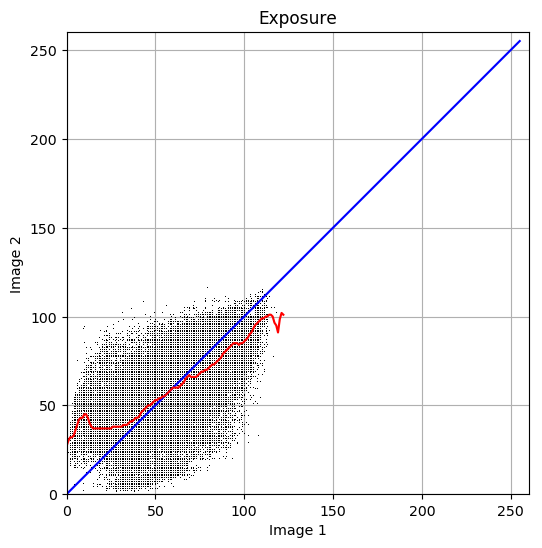

In [6]:
# Figure dimensions
fig_width = 6
fig_height = fig_width * img1.shape[0] / img1.shape[1]

# Display figure
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(fig_width, fig_width)
fig.dpi = 102

line1, = ax.plot(x1[idx], x2[idx])
line1.set_linestyle('None')
line1.set_marker(',')
line1.set_markeredgecolor('black')
line1.set_markerfacecolor('black')
line1.set_markersize(2)

line2, = ax.plot([0, 255], [0, 255])
line2.set_linestyle('solid')
line2.set_color("blue")
line2.set_marker('None')

line3, = ax.plot(np.arange(256), x2_median)
line3.set_linestyle('solid')
line3.set_color("red")
line3.set_marker('None')

ax.set_xlabel('Image 1')
ax.set_ylabel('Image 2')
ax.set_title('Exposure')
ax.set_xlim([0, 260])
ax.set_ylim([0, 260])
ax.grid(b=True)
ax.set_aspect('equal')

plt.show()

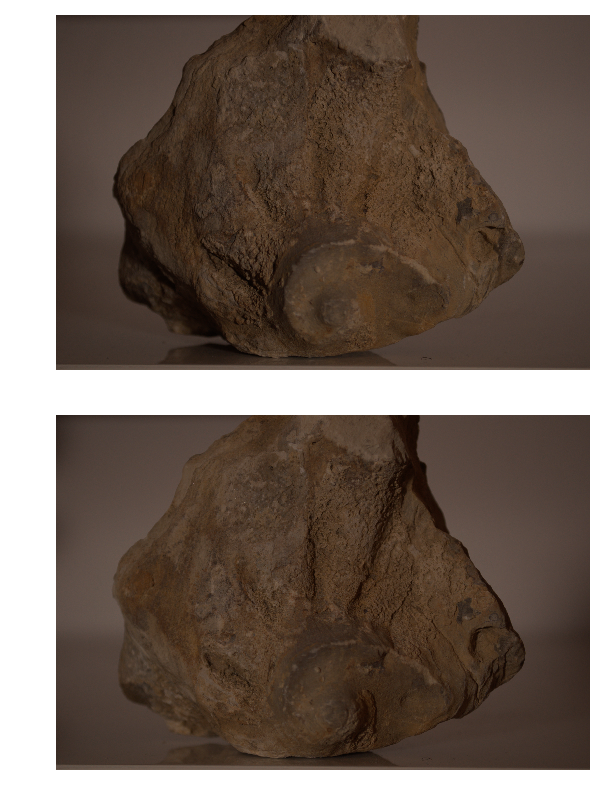

In [7]:
# Figure dimensions
fig_width = 6
fig_height = fig_width * img1.shape[0] / img1.shape[1]

# Display figure
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(fig_width, 2 * fig_height)
fig.dpi = 102
_ = axs[0].imshow(img1)
_ = axs[1].imshow(img2)
fig.tight_layout()
for ax in axs:
    ax.axis('off')
plt.show()

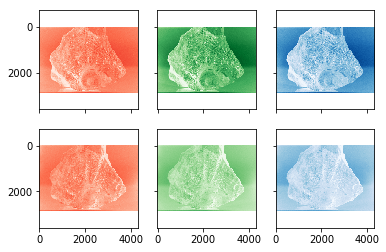

In [8]:
# Display figure: RGB layers
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
_ = ax[0, 0].imshow(img1[:, :, 0], cmap='Reds')
_ = ax[0, 1].imshow(img1[:, :, 1], cmap='Greens')
_ = ax[0, 2].imshow(img1[:, :, 2], cmap='Blues')
_ = ax[1, 0].imshow(img2[:, :, 0], cmap='Reds')
_ = ax[1, 1].imshow(img2[:, :, 1], cmap='Greens')
_ = ax[1, 2].imshow(img2[:, :, 2], cmap='Blues')

plt.show()

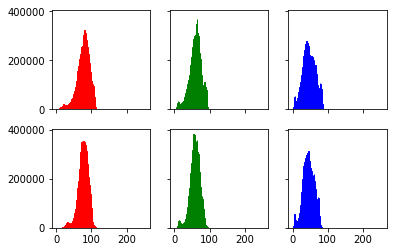

In [9]:
# Plot histogram
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
_ = ax[0, 0].hist(img1[:, :, 0].ravel(), bins=256, range=(0, 255), fc='r', ec='r')
_ = ax[0, 1].hist(img1[:, :, 1].ravel(), bins=256, range=(0, 255), fc='g', ec='g')
_ = ax[0, 2].hist(img1[:, :, 2].ravel(), bins=256, range=(0, 255), fc='b', ec='b')
_ = ax[1, 0].hist(img2[:, :, 0].ravel(), bins=256, range=(0, 255), fc='r', ec='r')
_ = ax[1, 1].hist(img2[:, :, 1].ravel(), bins=256, range=(0, 255), fc='g', ec='g')
_ = ax[1, 2].hist(img2[:, :, 2].ravel(), bins=256, range=(0, 255), fc='b', ec='b')

# Display
plt.show()

In [10]:
# Difference
img12 = img1 - img2
img12[img1 < img2] = 0

img21 = img2 - img1
img21[img2 < img1] = 0

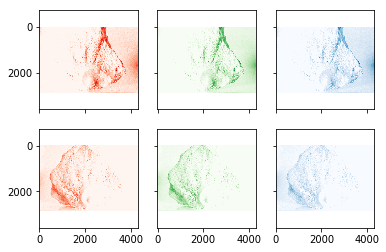

In [11]:
# RGB layers

# Display figure: 
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
_ = ax[0, 0].imshow(img12[:, :, 0], cmap='Reds')
_ = ax[0, 1].imshow(img12[:, :, 1], cmap='Greens')
_ = ax[0, 2].imshow(img12[:, :, 2], cmap='Blues')
_ = ax[1, 0].imshow(img21[:, :, 0], cmap='Reds')
_ = ax[1, 1].imshow(img21[:, :, 1], cmap='Greens')
_ = ax[1, 2].imshow(img21[:, :, 2], cmap='Blues')

plt.show()

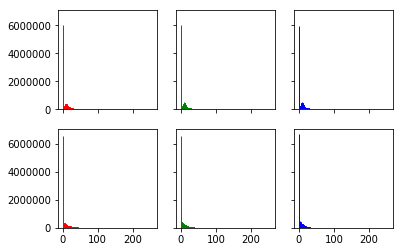

In [12]:
# Plot histogram
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
_ = ax[0, 0].hist(img12[:, :, 0].ravel(), bins=256, range=(0, 255), fc='r', ec='r')
_ = ax[0, 1].hist(img12[:, :, 1].ravel(), bins=256, range=(0, 255), fc='g', ec='g')
_ = ax[0, 2].hist(img12[:, :, 2].ravel(), bins=256, range=(0, 255), fc='b', ec='b')
_ = ax[1, 0].hist(img21[:, :, 0].ravel(), bins=256, range=(0, 255), fc='r', ec='r')
_ = ax[1, 1].hist(img21[:, :, 1].ravel(), bins=256, range=(0, 255), fc='g', ec='g')
_ = ax[1, 2].hist(img21[:, :, 2].ravel(), bins=256, range=(0, 255), fc='b', ec='b')

# Display
plt.show()

In [13]:
# Add difference images
img3 = img12 + img21

In [14]:
# Save processed image
PIL.Image.fromarray(img3).save('Output/img3.jpg', quality=90, optimize=True)

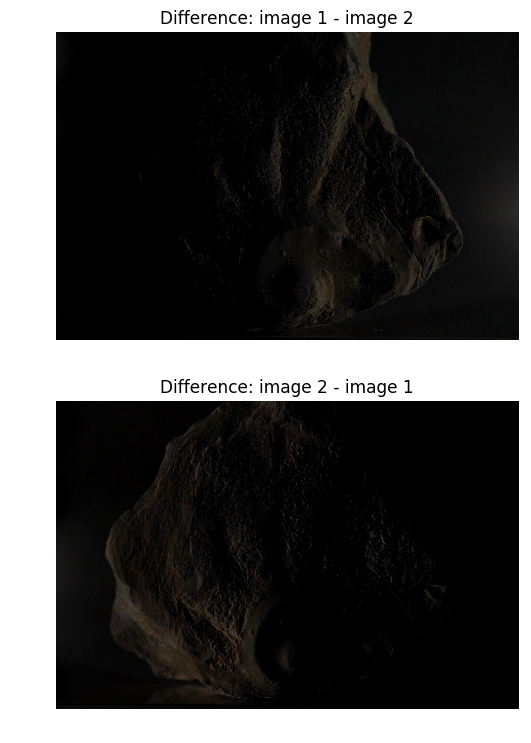

In [15]:
# Figure dimensions
fig_width = 6
fig_height = fig_width * img3.shape[0] / img3.shape[1]

# Display figure
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(fig_width, 2.2 * fig_height)
fig.dpi = 102
_ = axs[0].imshow(img12)
_ = axs[1].imshow(img21)
fig.tight_layout
axs[0].set_title("Difference: image 1 - image 2")
axs[1].set_title("Difference: image 2 - image 1")
for ax in axs:
    ax.axis('off')
plt.show()

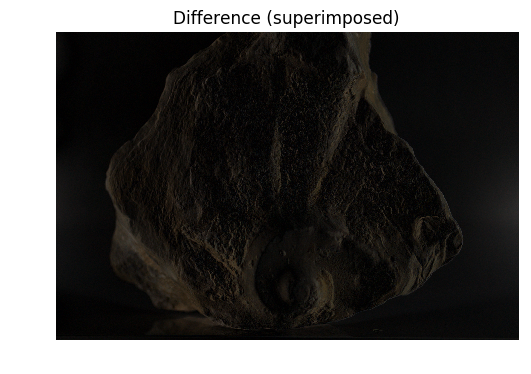

In [16]:
# Figure dimensions
fig_width = 6
fig_height = fig_width * img3.shape[0] / img3.shape[1]

# Display figure
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(fig_width, fig_height)
fig.dpi = 102
_ = ax.imshow(img3)
ax.set_title("Difference (superimposed)")
ax.axis('off')
plt.show()